### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

Parametro di forma stimato (a): 1.0136956814122464
Parametro di locazione stimato (loc): 0.0018548672822208847
Parametro di scala stimato (scale): 1.0012339400643235


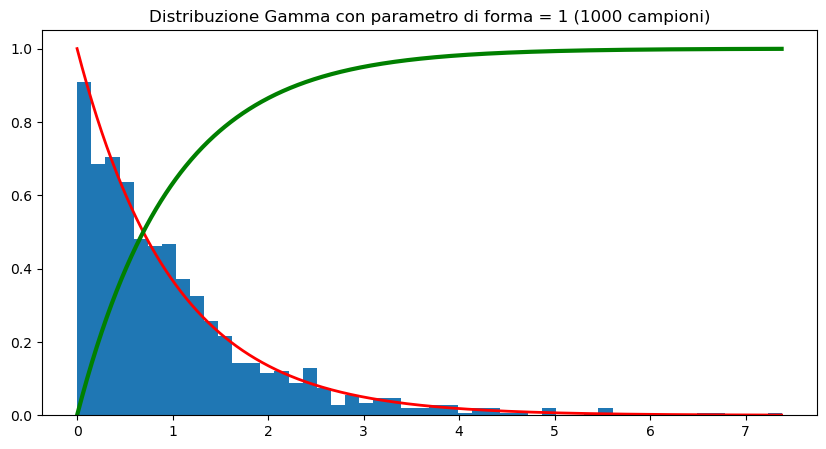

Varianza teorica: 1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp


#1
gamma_dist = sp.stats.gamma(a=1)  
campionamenti = gamma_dist.rvs(size=1000)  # rvs = numeri casuali in distribuzione gamma(parametro1)

#2
plt.figure(figsize=(10, 5))
#sns.histplot(campionamenti, kde=True, stat="density", bins=30, color='skyblue') #density fondamentale per sovrapposizione
plt.hist(campionamenti, density=True, bins=50)
plt.title('Distribuzione Gamma con parametro di forma = 1 (1000 campioni)')


x = np.linspace(0, max(campionamenti), 1000)  # valori tra 0 e massimo dei dati
pdf_values = gamma_dist.pdf(x)          # calcola la PDF della distribuzione teorica
plt.plot(x, pdf_values, color='red', linewidth=2, label='PDF teorica')

#campionamenti non va, sorted(campionamenti) è meglio ma comunque errato. bisogna usare x

#3
a_fit, loc_fit, scale_fit = sp.stats.gamma.fit(campionamenti)
print("Parametro di forma stimato (a):", a_fit)
print("Parametro di locazione stimato (loc):", loc_fit)
print("Parametro di scala stimato (scale):",scale_fit)

#4
cdf_values = gamma_dist.cdf(x) #calcolo funzione cumulativa CDF
plt.plot(x, cdf_values, color='green', linewidth=3, label='CDF teorica')
plt.show()

#5
varianza_teorica = gamma_dist.var()
print("Varianza teorica:", varianza_teorica)

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

MAE per le temperature massime: 0.7720553287903273
RMSE per le temperature massime: 1.9590341201099668e-09
MAE per le temperature minime: 16.123317814423185
RMSE per le temperature minime: 2.3085736206833e-05
0.9882502430477919
0.04572442620797301


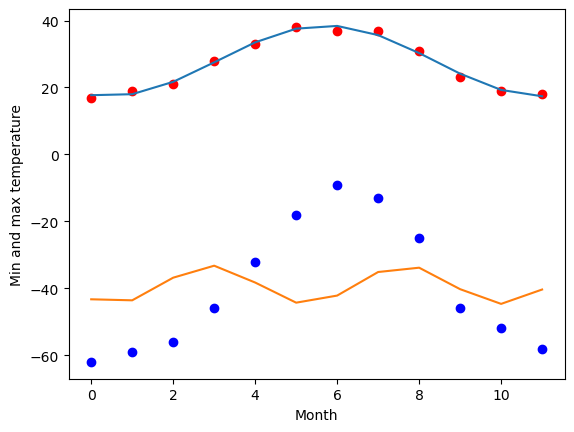

In [20]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")

import scipy as sp

"""coeff_max = np.polyfit(months, temp_max, 3) #valori fittati
coeff_min = np.polyfit(months, temp_min, 3)

pred_max = np.polyval(coeff_max, months) #valori predetti
pred_min = np.polyval(coeff_min, months)

MAE_max = np.mean(np.abs(temp_max - pred_max))
RMSE_max = np.sqrt(np.mean((temp_max - pred_max) ** 2))

MAE_min = np.mean(np.abs(temp_min - pred_min))
RMSE_min = np.sqrt(np.mean((temp_min - pred_min) ** 2))

#faccio fit dei dati. x = mesi(var indipendente), y = var dipendente(temperature), grado poliniomio
#uso fit(array coefficienti polinomio di grado scelto) e var indipendente per predirre valori polinomio
#per MAE e RMSE uso var dipendente y e i valori predetti"""


def curva(months,a,b,c,d):
    return a*np.sin(b*months + c) +d

par_max, _ = sp.optimize.curve_fit(curva, months, temp_max)
par_min, _ = sp.optimize.curve_fit(curva, months, temp_min)
a_max = par_max[0]
b_max = par_max[1]
c_max = par_max[2]
d_max = par_max[3]
a_min = par_min[0]
b_min = par_min[1]
c_min = par_min[2]
d_min = par_min[3]

temppred_min = curva(months, *par_min)
temppred_max = curva(months, *par_max)

plt.plot(months, a_max*np.sin(b_max*months + c_max) +d_max)
plt.plot(months, a_min*np.sin(b_min*months + c_min) +d_min)

MAE_max = np.mean(np.abs(temp_max - temppred_max))
MAE_min = np.mean(np.abs(temp_min - temppred_min))
RMSE_max = np.sqrt(np.mean(temp_max - temppred_max)**2)
RMSE_min = np.sqrt(np.mean(temp_min - temppred_min)**2)

R2_max = 1 - (np.sum((temp_max - temppred_max)**2) / np.sum((temp_max - np.mean(temp_max))**2))
R2_min = 1 - (np.sum((temp_min - temppred_min)**2) / np.sum((temp_min - np.mean(temp_min))**2))



# Stampare i risultati
print("MAE per le temperature massime:", MAE_max)
print("RMSE per le temperature massime:", RMSE_max)
print("MAE per le temperature minime:", MAE_min)
print("RMSE per le temperature minime:", RMSE_min)
print(R2_max)
print(R2_min)


### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

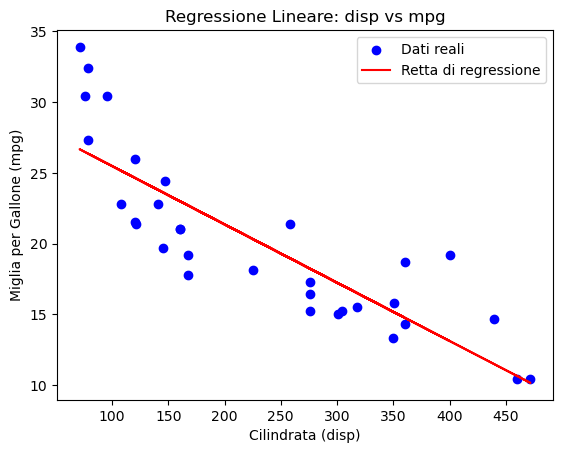

Coefficiente angolare (m): -0.041215119962786144
Intercetta (b): 29.59985475616395
R^2 (coefficiente di determinazione): 0.7183433404897299


In [ ]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df


x = df['disp'].values  # variabile indipendente: cilindrata
y = df['mpg'].values   # variabile dipendente: miglia per gallone


N = len(x)  # numero di dati

# Calcoliamo il coefficiente angolare (m) e l'intercetta (b) della retta
m = (N * np.sum(x * y) - np.sum(x) * np.sum(y)) / (N * np.sum(x**2) - (np.sum(x))**2)
q = (np.sum(y) - m * np.sum(x)) / N

# Prediciamo i valori di 'mpg' usando la retta di regressione
y_pred = m * x + q

# Calcoliamo R^2 (coefficiente di determinazione)
ss_tot = np.sum((y - np.mean(y))**2)  # somma dei quadrati totali
ss_res = np.sum((y - y_pred)**2)       # somma dei quadrati residui
r_squared = 1 - (ss_res / ss_tot)      # calcoliamo R^2

plt.scatter(x, y, color='blue', label='Dati reali')  # Dati reali
plt.plot(x, y_pred, color='red', label='Retta di regressione')  # Regressione lineare
plt.xlabel('Cilindrata (disp)')
plt.ylabel('Miglia per Gallone (mpg)')
plt.title('Regressione Lineare: disp vs mpg')
plt.legend()
plt.show()

mae = np.mean(np.abs(y-y_pred))
rmse = np.sqrt(np.mean(y -y_pred)**2)

# 7. Visualizziamo i risultati
print('Coefficiente angolare (m):', m)
print('Intercetta (b):', q)
print('R^2 (coefficiente di determinazione):', r_squared)